Authors
- Joana Simões
- Pedro Carrasco


# Dataset Analysis

In [34]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [19]:
# Columns Categories
meals = [1, 2, 3, 4, 5, 6, 7, 8]
market = [23, 25, 24, 27]
transports = [28, 30, 33]
internet = [37, 38]
habitation = [48, 49]
cols = meals + market + transports + internet + habitation
columns = [f'x{c}' for c in cols if c!=0]
columns = ['country'] + columns

In [4]:
columns

['country',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x23',
 'x25',
 'x24',
 'x27',
 'x28',
 'x30',
 'x33',
 'x37',
 'x38',
 'x48',
 'x49']

In [2]:
sns.set_style('darkgrid')

In [35]:
path = os.path.join('..', 'data', 'dataset_alpha.csv')

In [6]:
data = pd.read_csv(path)
data

,country,x1,x2,x3,x4,x5,x6,x7,x8,x23,...,pop_0_14_%,pop_0_14_%_female,pop_0_14_%_male,pop_15_64_%,pop_15_64_%_female,pop_15_64_%_male,pop_65_plus_%,pop_65_plus_%_female,pop_65_plus_%_male,continent
0,Afghanistan,1.690000,6.870000,2.977500,2.260000,NaN,0.597500,0.327500,0.140000,0.226000,...,43.424543,42.836470,44.000703,54.171399,54.395516,53.951822,2.404058,2.768015,2.047475,Asia
1,Albania,4.460000,25.532000,4.223333,1.378667,1.842667,1.198667,1.148667,0.604000,0.534000,...,16.281724,15.945701,16.618407,67.484035,67.366308,67.601993,16.234241,16.687991,15.779600,Europe
2,Algeria,1.956562,13.983750,2.830000,1.419615,1.627778,0.507333,0.489091,0.198788,0.270294,...,30.712077,30.617768,30.802962,63.105923,62.825857,63.375825,6.182000,6.556375,5.821213,Africa
3,American Samoa,23.820000,6.660000,22.130000,1.910000,1.910000,1.000000,1.190000,2.110000,NaN,...,27.511935,26.431021,28.615012,65.643388,65.910490,65.370811,6.844676,7.658489,6.014177,Oceania
4,Andorra,13.173333,40.920000,7.010000,2.073333,2.600000,1.380000,1.713333,1.370000,0.760000,...,13.074753,13.063209,13.085814,72.389731,71.570972,73.174267,14.535516,15.365819,13.739919,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Venezuela,8.618824,32.763333,9.021765,1.442353,2.205882,1.928824,1.110000,0.799412,1.235714,...,28.170727,27.150558,29.211820,63.491136,63.327932,63.657687,8.338137,9.521510,7.130493,South America
211,Vietnam,2.115882,18.662353,4.231429,0.790625,1.542353,1.689412,0.478824,0.281176,0.640526,...,22.545150,21.130319,23.995125,68.701716,68.456868,68.952645,8.753134,10.412813,7.052230,Asia
212,Yemen,6.150000,32.616667,11.158333,2.265000,2.282500,2.540000,1.610000,0.660000,1.072000,...,39.872107,39.344254,40.388712,57.438854,57.554137,57.326028,2.689038,3.101609,2.285260,Asia
213,Zambia,2.988000,18.370000,3.170000,1.152000,1.494000,1.742000,0.822000,0.458000,0.890000,...,43.262363,42.711936,43.827404,54.998707,55.174338,54.818413,1.738930,2.113726,1.354183,Africa


## Missing values

In [5]:
data.isnull().sum()

country                  0
x1                       3
x2                       3
x3                       4
x4                       4
x5                       5
x6                       3
x7                       1
x8                       1
x23                      6
x25                     10
x24                      6
x27                      9
x28                     12
x30                     14
x33                      7
x37                     17
x38                      9
x48                      4
x49                      3
unesco_props            30
safety_index            75
quality_of_life         30
total_population        19
code                     7
GDP                      9
pop_0_14_%              14
pop_0_14_%_female       14
pop_0_14_%_male         14
pop_15_64_%             14
pop_15_64_%_female      14
pop_15_64_%_male        14
pop_65_plus_%           14
pop_65_plus_%_female    14
pop_65_plus_%_male      14
dtype: int64

In [6]:
missing_values = pd.DataFrame(data.isnull().sum()).reset_index()

Text(0.5, 1.0, 'Number of missing values in each feature of the dataset')

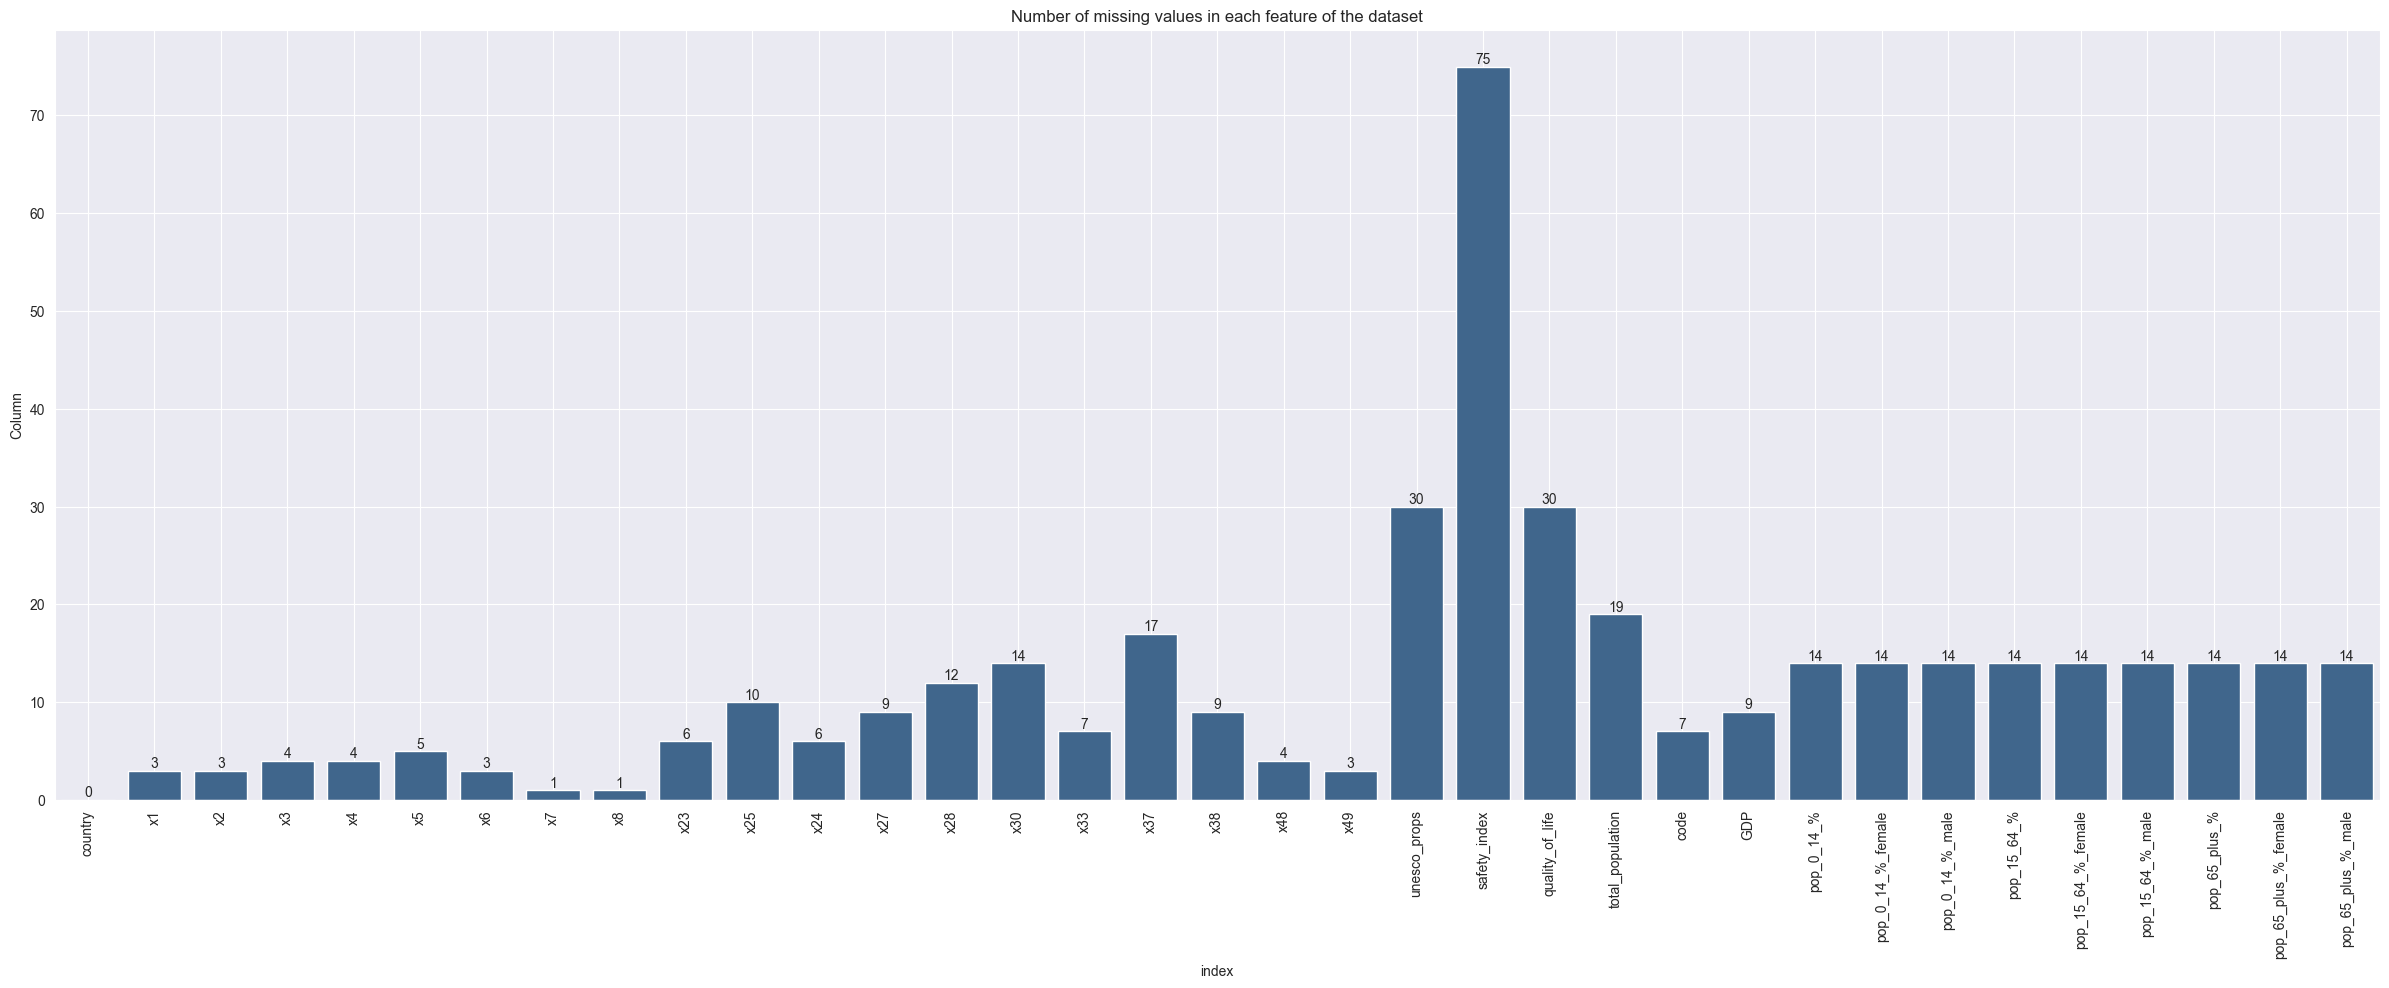

In [7]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=missing_values, x='index', y=0, color=(0.2, 0.4, 0.6, 0.6))
for i in ax.containers:
    ax.bar_label(i,)
plt.grid(True)
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.ylabel('Column')
plt.title('Number of missing values in each feature of the dataset')

## Data distribution and values

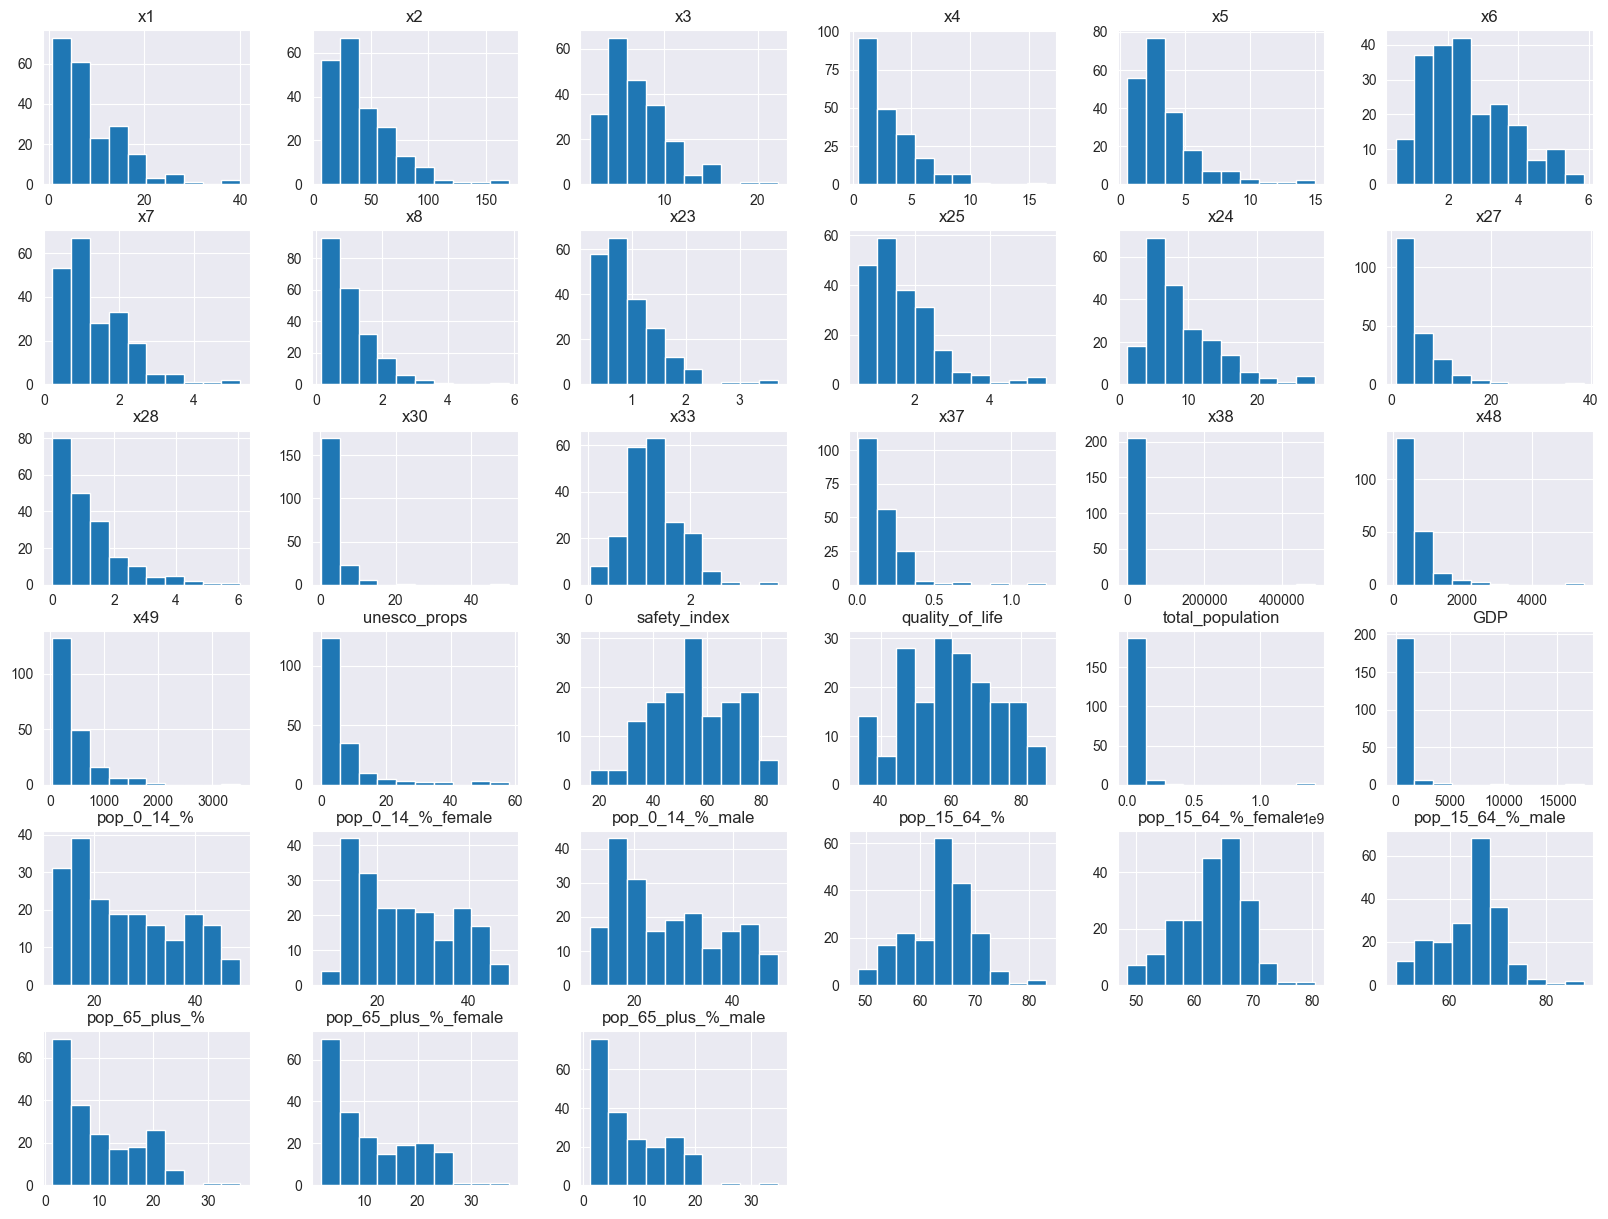

In [8]:
data.hist(figsize=(20, 15))
plt.show()

## Data types

In [9]:
data.loc[data.unesco_props.isnull(), 'unesco_props'] = -1
data.unesco_props = data.unesco_props.astype(int)
data.loc[data.total_population.isnull(), 'total_population'] = -1
data.total_population = data.total_population.astype(int)

<AxesSubplot: title={'center': '% of each data type'}, ylabel='Type of variable'>

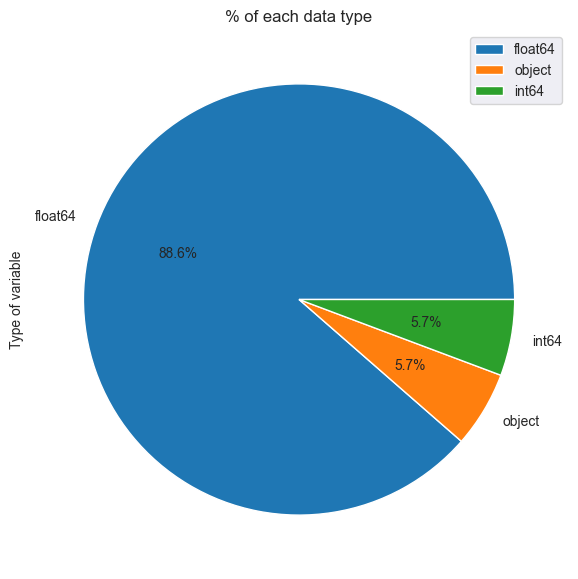

In [10]:
counts = pd.DataFrame(data.dtypes.value_counts(), columns=['Type of variable'])
counts.plot(kind='pie', y='Type of variable', figsize=(7, 7), title='% of each data type',  autopct='%1.1f%%')

In [11]:
data.loc[data.unesco_props == -1, 'unesco_props'] = np.NaN
data.loc[data.total_population == -1, 'total_population'] = np.NaN

<AxesSubplot: >

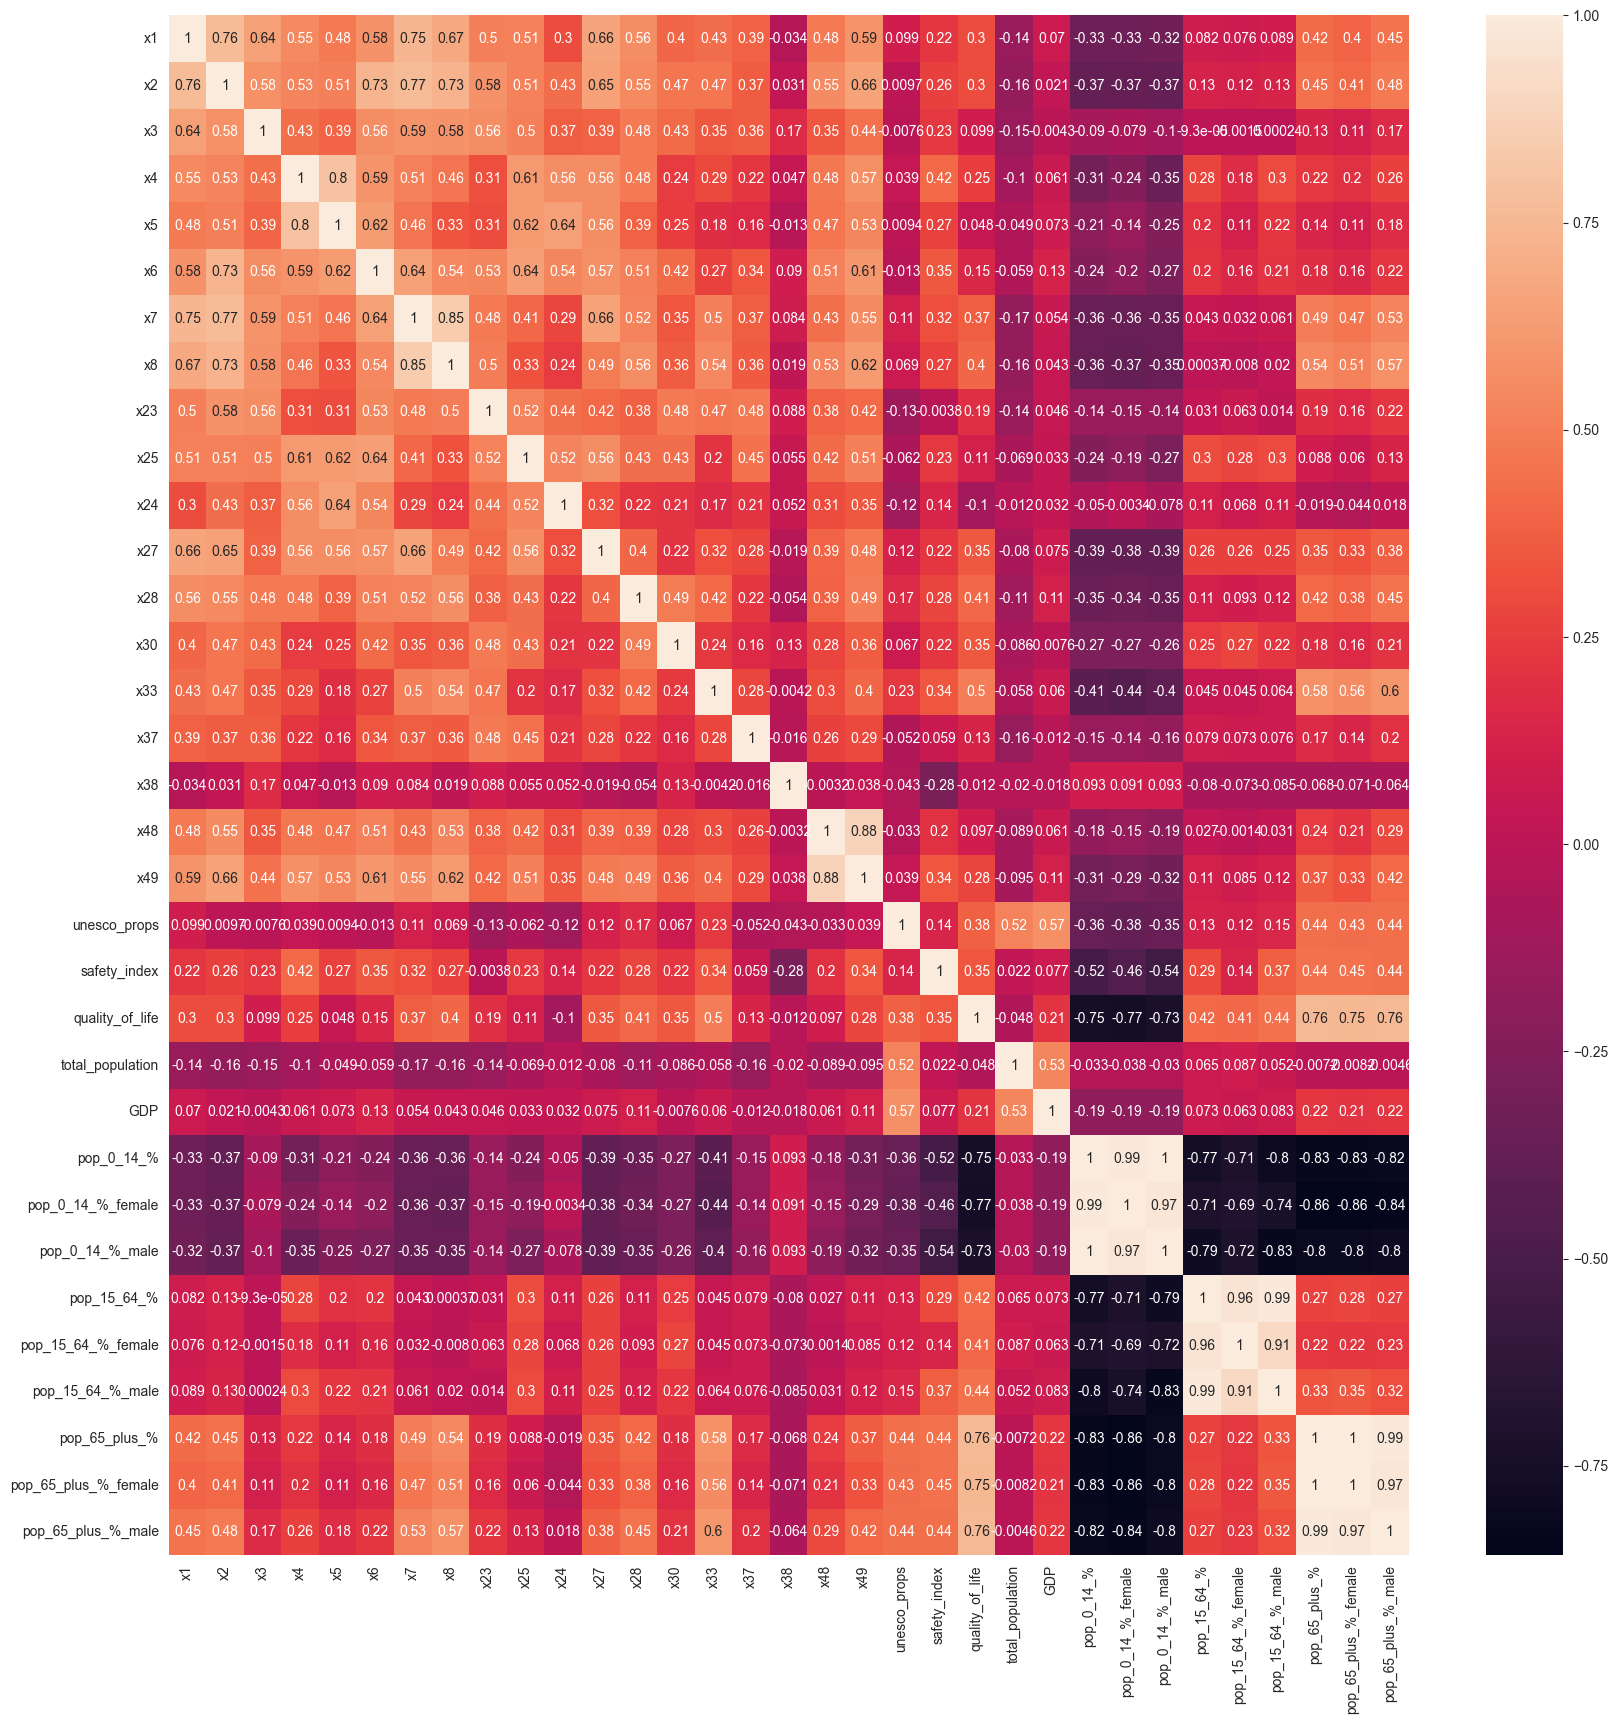

In [15]:
plt.figure(figsize=(20,20))
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot=True)


<AxesSubplot: >

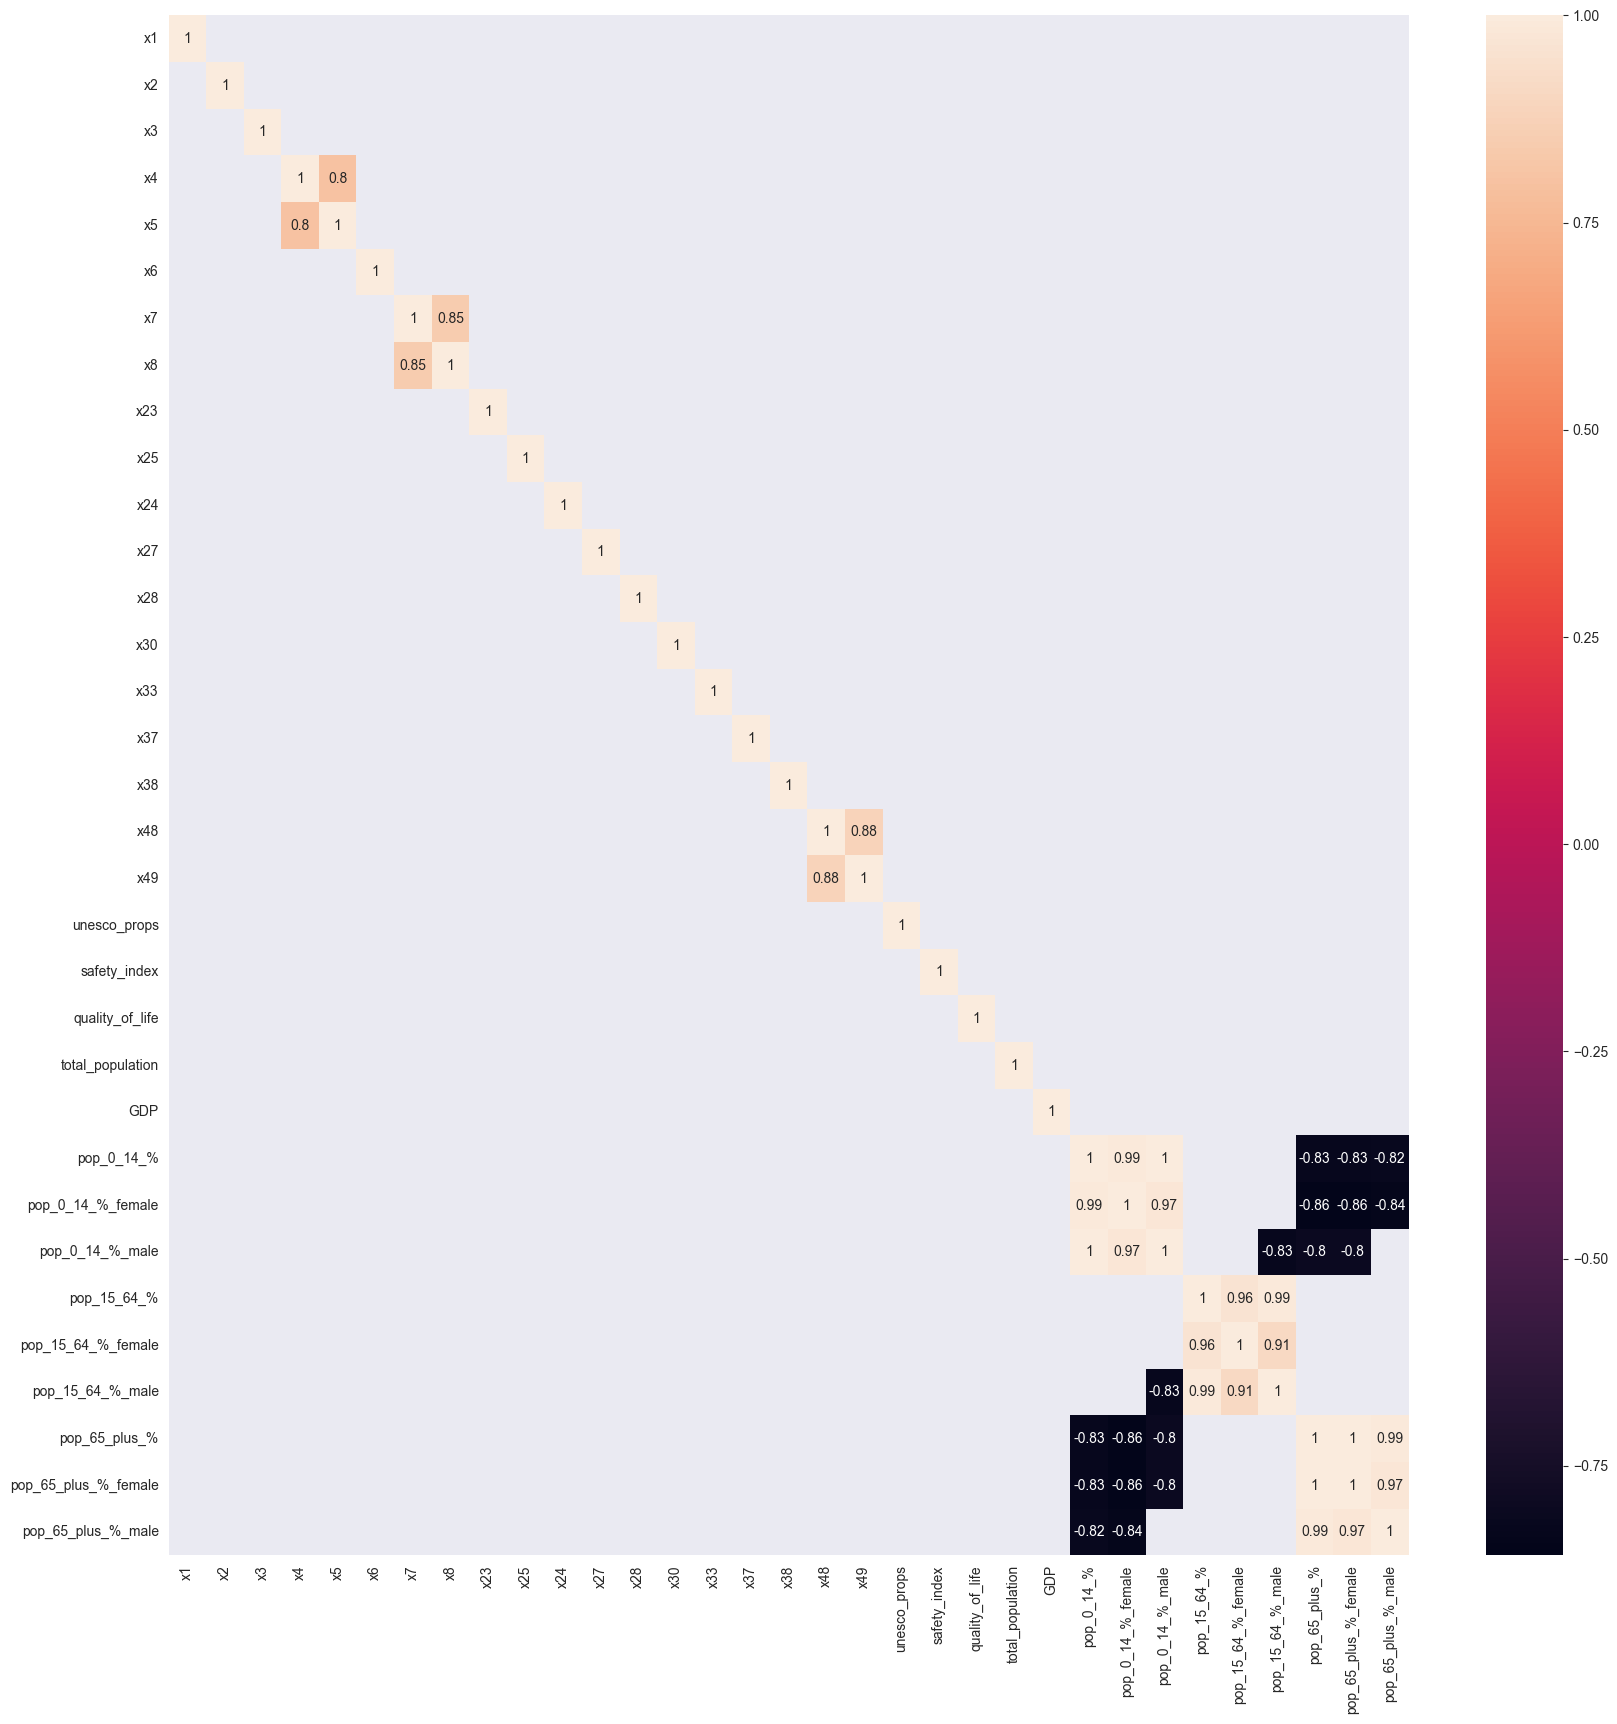

In [17]:
plt.figure(figsize=(20,20))
corr = data.corr(numeric_only=True)
correlated = corr[corr.abs() > 0.8]
sns.heatmap(correlated,annot=True)

 Correlations show obvious values due to the similarity of its values

## Average cost by country 

In [7]:
# open metadata.csv that contains the description of the columns used
path2 = os.path.join('..', 'data', 'metadata.csv')
data2 = pd.read_csv(path2,sep=";")

# axiliar list
aux = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x23', 'x25', 'x24', 'x27', 'x28', 'x30', 'x33', 'x37', 'x38', 'x48', 'x49']

# coy only the description of the columns in main dataset
data2 = data2.loc[data2["attribute"].isin(aux)].copy()

# reset the index of the DataFrame
data2 = data2.reset_index()

# drop index column
data2 = data2.drop(["index"], axis=1)
data2

,attribute,description
0,x1,"Meal, Inexpensive Restaurant (USD)"
1,x2,"Meal for 2 People, Mid-range Restaurant, Three..."
2,x3,McMeal at McDonalds (or Equivalent Combo Meal)...
3,x4,"Domestic Beer (0.5 liter draught, in restauran..."
4,x5,"Imported Beer (0.33 liter bottle, in restauran..."
5,x6,"Cappuccino (regular, in restaurants) (USD)"
6,x7,"Coke/Pepsi (0.33 liter bottle, in restaurants)..."
7,x8,"Water (0.33 liter bottle, in restaurants) (USD)"
8,x23,"Water (1.5 liter bottle, at the market) (USD)"
9,x24,"Bottle of Wine (Mid-Range, at the market) (USD)"


In [8]:
# sum all the columns for each row in the dataset
data[aux].sum(axis=1)

aux = ['x1', 'x2', 'x8', 'x38', 'x48']

# add the sum to a new column in the dataset
data["Average_cost"] = data[aux].sum(axis=1)

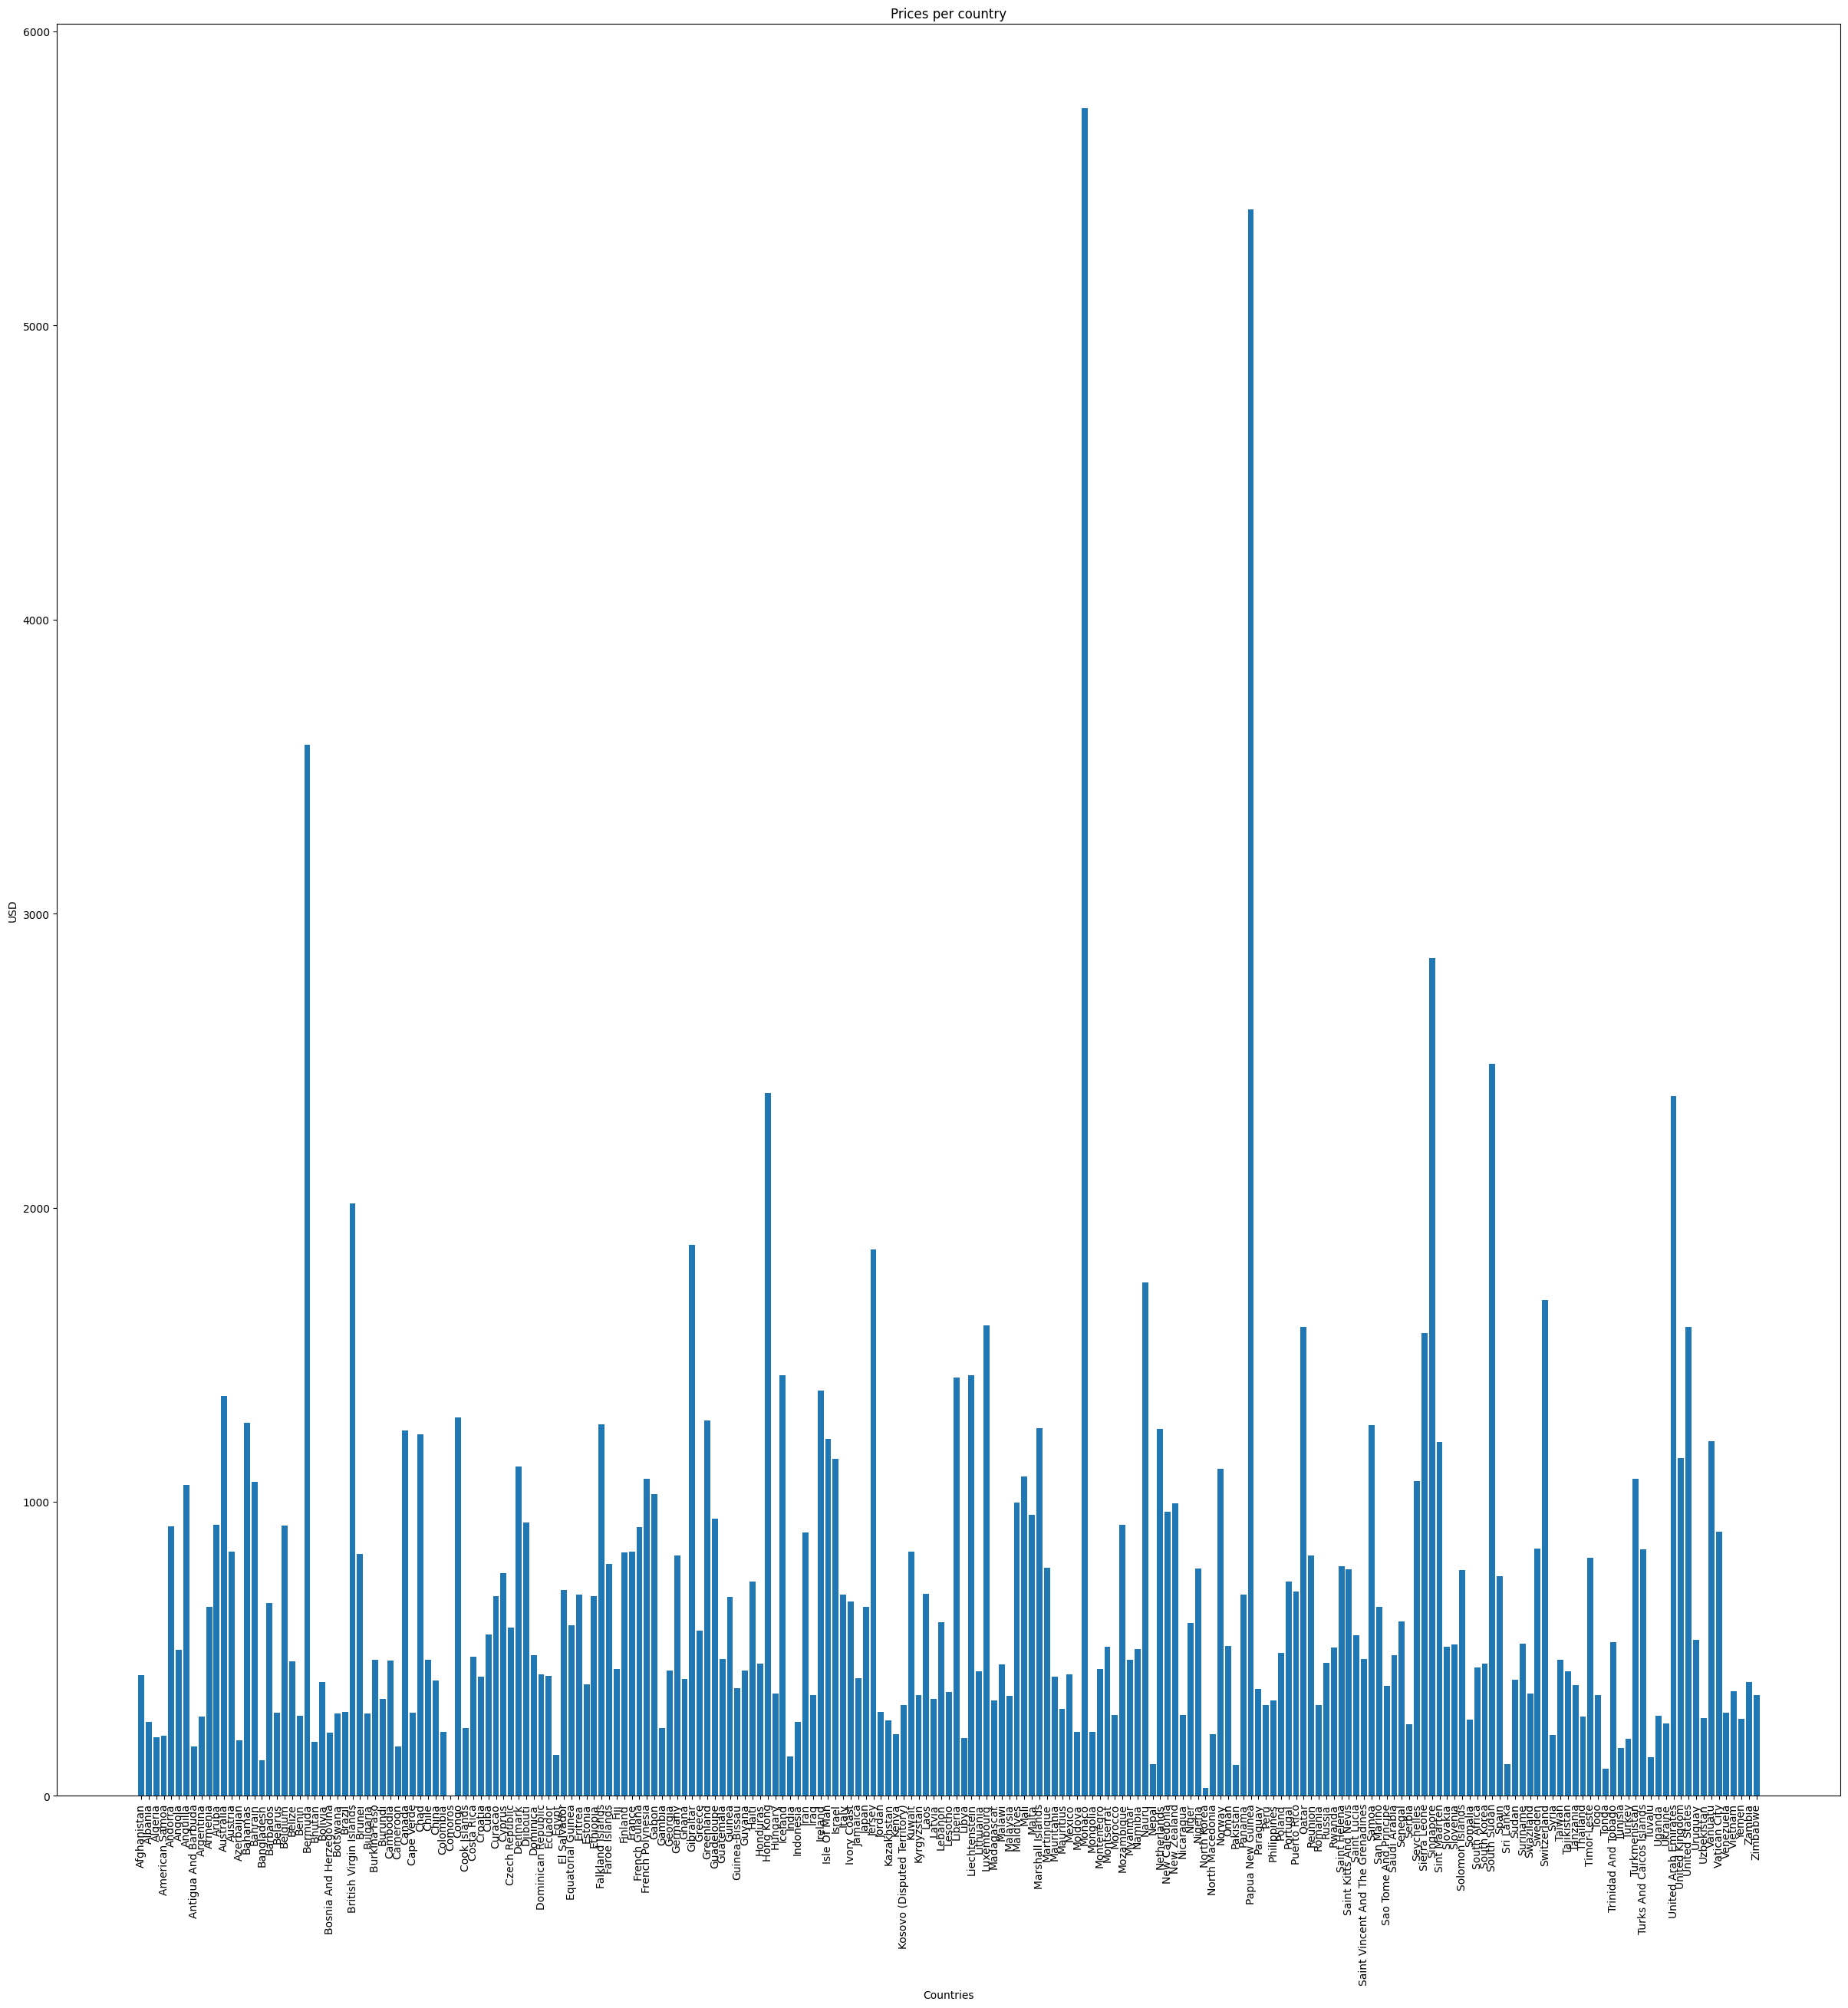

In [29]:
# plot the mean of each country
# create a list of values to plot
values = data["Average_cost"]

# create a list of labels for each value
labels = data.country

#
plt.figure(figsize=(30, 30))

# create a bar plot
plt.xticks(rotation=90)
# create a bar plot
plt.bar(labels, values)
plt.ylabel('USD')
plt.xlabel('Countries')

# add a title to the chart
plt.title('Prices per country')

# show the chart
plt.show()

In [17]:
# Create a Plotly world map with country codes
fig = px.choropleth(data_frame=data,
                    locations='code',
                    locationmode='ISO-3',
                    color='Average_cost',
                    scope='world',
                    width=1000,
                    height=750)

fig.show()

## % of impact on trip prices

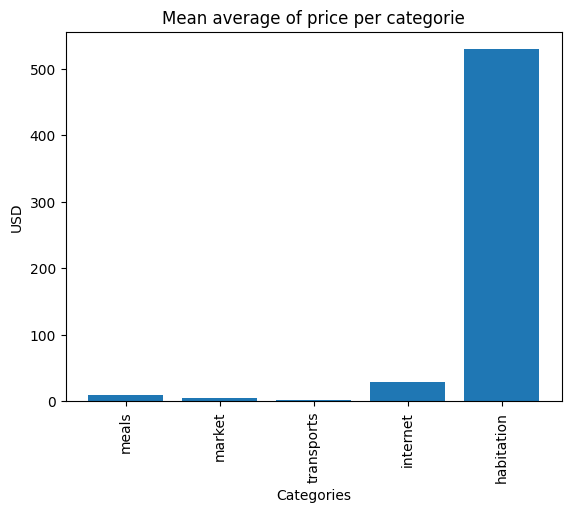

In [27]:
# Extract the columns from the dataset and put them into categories
meals = [1, 2, 3, 4, 5, 6, 7, 8]
market = [9, 10, 11, 12]
transports = [13, 14, 15]
internet = [16, 17]
habitation = [18, 19]

# plot the mean of each categorie
# create a list of values to plot
values = [data.iloc[:,meals].mean().mean(), 
          data.iloc[:,market].mean().mean(), 
          data.iloc[:,transports].mean().mean(),
          data.iloc[:,internet].mean().mean(), 
          data.iloc[:,habitation].mean().mean()]

# create a list of labels for each value
labels = ["meals", "market", "transports", "internet", "habitation"]
plt.xticks(rotation=90)
# create a bar plot
plt.bar(labels, values)
plt.ylabel('USD')
plt.xlabel('Categories')
# add a title to the chart
plt.title('Mean average of price per categorie')

# show the chart
plt.show()


In [22]:
perc_meals      = data.iloc[:,meals].mean().mean()
perc_market     = data.iloc[:,market].mean().mean()
perc_transports = data.iloc[:,transports].mean().mean()
perc_internet   = data.iloc[:,internet].mean().mean()
perc_habitation = data.iloc[:,habitation].mean().mean()

total = perc_meals + perc_market + perc_transports + perc_internet + perc_habitation
print("total: ", total)

perc_meals       = 100 * perc_meals      / total
perc_market      = 100 * perc_market     / total
perc_transports  = 100 * perc_transports / total
perc_internet    = 100 * perc_internet   / total
perc_habitation  = 100 * perc_habitation / total

total:  573.3324053876283


In [23]:
# printing the categories percentage
print("percentage for meals: "      , perc_meals)
print("percentage for market: "     , perc_market)
print("percentage for transports: " , perc_transports)
print("percentage for internet: "   , perc_internet)
print("percentage for habitation: " , perc_habitation)

percentage for meals:  1.5098279970783814
percentage for market:  0.735319433473253
percentage for transports:  0.323892836598348
percentage for internet:  5.149083943111141
percentage for habitation:  92.28187578973886


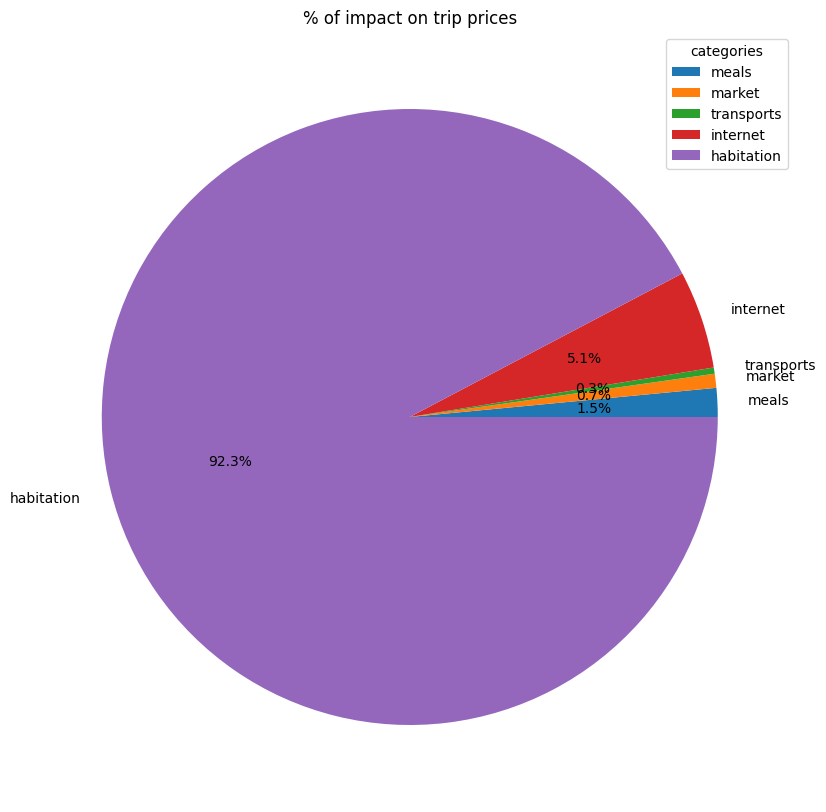

In [24]:
values = [perc_meals, perc_market, perc_transports, perc_internet, perc_habitation]
labels = ["meals", "market", "transports", "internet", "habitation"]

#
plt.figure(figsize=(10, 10))

# create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# add a legend to the chart
plt.legend(title='categories', loc='upper right')

# add a title to the chart
plt.title('% of impact on trip prices')

# show the chart
plt.show()

## Higher an lowest values

In [36]:
data = pd.read_csv(path)

In [37]:
data.describe()

,unesco_props,safety_index,quality_of_life,total_population,GDP,pop_0_14_%,pop_0_14_%_female,pop_0_14_%_male,pop_15_64_%,pop_15_64_%_female,...,male_population,average_cost_rich,average_cost_medium,average_cost_lower,cost_average,meals,market,transports,telecommunications,accomodation
count,185.000000,140.000000,185.000000,1.960000e+02,206.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,2.010000e+02,185.000000,188.000000,193.000000,194.000000,209.000000,213.000000,209.000000,209.000000,213.000000
mean,6.675676,55.026429,60.098378,3.950464e+07,379.575777,26.358540,25.914449,26.937013,63.794796,63.107574,...,1.962439e+07,743.768627,488.748648,427.633373,548.267173,24.593068,4.266185,5.593580,31.027469,17.306321
std,10.289965,15.231596,13.046316,1.473541e+08,1517.612922,10.410557,10.415529,10.478275,6.082005,5.487042,...,7.456941e+07,648.456035,395.968462,383.315030,456.007225,14.564110,2.366235,5.470159,33.119256,17.588251
min,0.000000,16.400000,33.600000,1.120400e+04,0.040000,11.708142,7.684416,11.072750,48.676006,48.492026,...,5.755000e+03,119.105553,61.402017,46.694875,77.047017,5.401667,0.984896,0.876659,0.100000,1.961206
25%,1.000000,44.175000,49.600000,1.607265e+06,5.642500,16.799407,16.232604,17.437195,59.765951,59.511215,...,6.735980e+05,355.634006,222.574817,176.180031,246.794901,13.973704,2.528089,2.521250,11.946833,6.673648
50%,3.000000,54.050000,59.700000,8.674117e+06,30.465000,24.881860,24.682518,24.499877,64.763727,63.786528,...,4.218841e+06,522.295000,361.942000,278.848029,404.832252,20.257778,3.484500,4.111875,22.155000,11.397148
75%,7.000000,66.950000,68.800000,2.837881e+07,208.950000,34.619919,34.364632,35.743473,67.484035,66.803460,...,1.395681e+07,920.470815,637.912862,567.660000,724.306114,33.523333,5.388203,7.160979,36.880000,21.925124
max,58.000000,86.200000,87.200000,1.412360e+09,17420.000000,48.904641,48.813212,48.993461,83.098552,80.522716,...,7.265034e+08,5466.682500,2256.080000,2117.900000,2709.686667,79.333333,13.861000,56.140000,287.235000,147.892204


In [38]:
labels = ['Higher Cost', 'Medium Cost', 'Lowest Cost', 'Security Index', 'Quality of Life Index', 'UNESCO Properties', 'GDP', 'Population']
variables = ['average_cost_rich', 'average_cost_medium', 'average_cost_lower', 'safety_index', 'quality_of_life', 'unesco_props', 'GDP', 'total_population']

In [40]:
for name, variable in zip(labels, variables):
    print('-------------------------')
    print(name)
    print('Higher: ', data.loc[data[variable] == data[variable].max(), 'country'])
    print('Lowest: ', data.loc[data[variable] == data[variable].min(), 'country'])

-------------------------
Higher Cost
Higher:  147    Papua New Guinea
Name: country, dtype: object
Lowest:  145    Pakistan
Name: country, dtype: object
-------------------------
Medium Cost
Higher:  22    Bermuda
Name: country, dtype: object
Lowest:  181    Sri Lanka
Name: country, dtype: object
-------------------------
Lowest Cost
Higher:  22    Bermuda
Name: country, dtype: object
Lowest:  181    Sri Lanka
Name: country, dtype: object
-------------------------
Security Index
Higher:  154    Qatar
Name: country, dtype: object
Lowest:  210    Venezuela
Name: country, dtype: object
-------------------------
Quality of Life Index
Higher:  185    Sweden
Name: country, dtype: object
Lowest:  176    Somalia
Name: country, dtype: object
-------------------------
UNESCO Properties
Higher:  93    Italy
Name: country, dtype: object
Lowest:  14                              Bahamas
23                               Bhutan
29                               Brunei
32                              B